<a href="https://colab.research.google.com/github/RizaldyAli/PCVK_Ganjil_2023/blob/main/week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukan nilai keceharan: 50


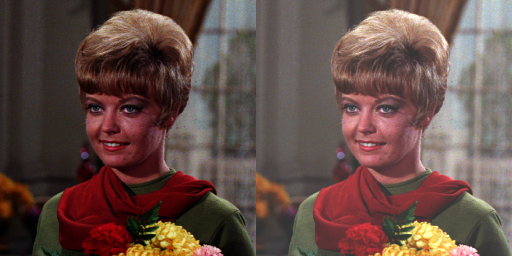

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukan nilai keceharan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#TUGAS PRAKTIKUM

## 1. Inverse Citra

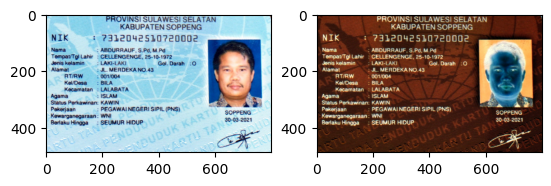

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/KTP.jpeg')
img_asli = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_inverse = 255 - img_asli

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_asli)
ax[1].imshow(img_inverse)

## 2.  Transformasi Contrast

 Mengubah kontras dan tingkat kecerahan 
----------------------------------------
Masukan nilai keceharan [-255  -  255]: 50
Masukkan kontras [1.0  -  3.0]: 2


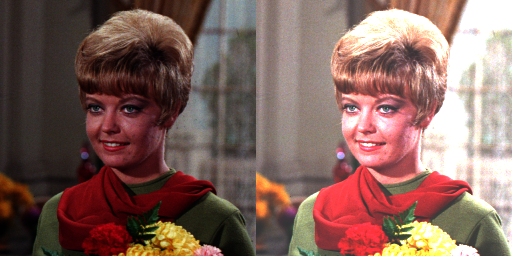

In [7]:
print(' Mengubah kontras dan tingkat kecerahan ')
print('----------------------------------------')

try:
  brightness = int(input('Masukan nilai keceharan [-255  -  255]: '))
  contrast = float(input('Masukkan kontras [1.0  -  3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)


for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

## 3. Transformasi Logarithmic Brightness

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai keceharan : 50


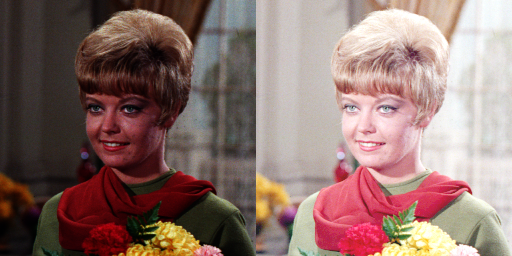

In [9]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai keceharan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness *(np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## 4. Transformasi Grayscale

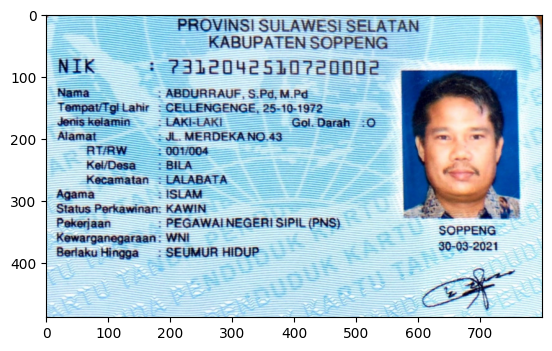

In [20]:
img = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/KTP.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

## A. Averaging

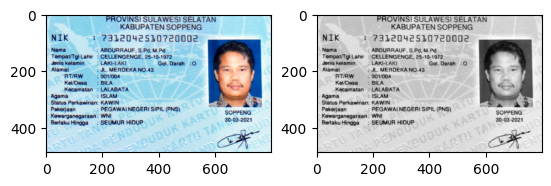

In [28]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/KTP.jpeg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)

ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

## B. Lightness

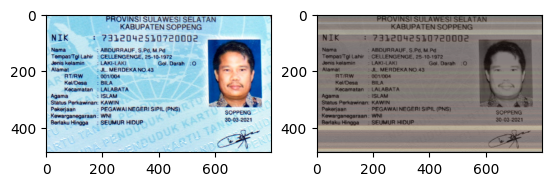

In [29]:
img_light = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/KTP.jpeg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

## C. Luminance

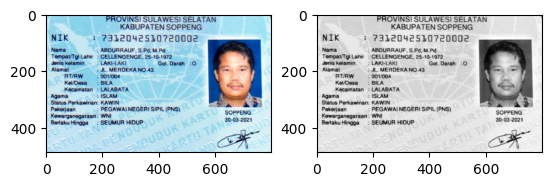

In [31]:
img_lum = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/KTP.jpeg')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

## 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale